In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ftfy import fix_text

In [ ]:
MVA_Trophy = pd.read_csv("Michael_Jordan_Trophy.csv")

#MVA_Trophy["name"] = MVA_Trophy["name"].apply(fix_text)
print(MVA_Trophy)

    Unnamed: 0  rank                   name   season
0            0     1  Giannis Antetokounmpo  2019-20
1            1     2           LeBron James  2019-20
2            2     3           James Harden  2019-20
3            3     4            Luka Dončić  2019-20
4            4     5          Kawhi Leonard  2019-20
..         ...   ...                    ...      ...
56          56     5          Jalen Brunson  2023-24
57          57     6           Jayson Tatum  2023-24
58          58     7        Anthony Edwards  2023-24
59          59     8       Domantas Sabonis  2023-24
60          60     9           Kevin Durant  2023-24

[61 rows x 4 columns]


In [106]:
Players_Info = pd.read_csv("players_info.csv")


print(Players_Info.head(5))
print(len(Players_Info))

            Name  Birth_date  Death_date  Age Status  Height  Weight  \
0  Tobias Harris  1992-07-15         NaN   33  Alive     203     102   
1    Joel Embiid  1994-03-16         NaN   31  Alive     213     127   
2  Norman Powell  1993-05-25         NaN   32  Alive     190      97   
3   Jordan Walsh  2004-03-03         NaN   21  Alive     201      92   
4   Jared Dudley  1985-07-10         NaN   40  Alive     198     107   

     Nationality                                          Positions Shoots  \
0  United States                 ['Power Forward', 'Small Forward']  Right   
1  United States                                         ['Center']  Right   
2  United States                ['Shooting Guard', 'Small Forward']  Right   
3  United States                 ['Small Forward', 'Power Forward']  Right   
4  United States  ['Power Forward', 'Small Forward', '', 'Shooti...  Right   

         Current_team  Experience   PTS  
0     Detroit Pistons          14  16.1  
1  Philadelphi

In [81]:
df_trophy = pd.merge(MVA_Trophy , Players_Info[['Name' , 'Height']] , left_on= 'name', right_on='Name', how='left')
nan_names = df_trophy[df_trophy['Height'].isna()]['name'].tolist()
print("NaN:", nan_names)

for i in range(len(nan_names)):
    df_trophy.loc[df_trophy[f'name'] == f'{nan_names[i]}' , 'Height'] = df_trophy['Height'].mean()

nan_names = df_trophy[df_trophy['Height'].isna()]['name'].tolist()
print("NaN:", nan_names)

NaN: ['Derrick Rose', 'Ben Simmons']
NaN: []


In [89]:
df_top50 = Players_Info.nlargest(50, 'PTS')

#check_nan_height
nan_height = df_top50[df_top50['Height'].isna()]['Name'].tolist()
print("NaN:", nan_height)

print(df_top50.head(5))

NaN: []
             Name  Birth_date  Death_date  Age Status  Height  Weight  \
72    Luka Dončić  1999-02-28         NaN   26  Alive     198     104   
1     Joel Embiid  1994-03-16         NaN   31  Alive     213     127   
140  Kevin Durant  1988-09-29         NaN   36  Alive     211     108   
119  LeBron James  1984-12-30         NaN   40  Alive     206     113   
210    Trae Young  1998-09-19         NaN   27  Alive     185      74   

       Nationality                                          Positions Shoots  \
72        Slovenia                  ['Point Guard', 'Shooting Guard']  Right   
1    United States                                         ['Center']  Right   
140  United States  ['Small Forward', 'Power Forward', '', 'Shooti...  Right   
119  United States  ['Small Forward', 'Power Forward', 'Point Guar...  Right   
210  United States                                    ['Point Guard']  Right   

           Current_team  Experience   PTS  
72   Los Angeles Lakers     

In [96]:
trophy_stats = df_trophy['Height'].describe()
top50_stats = df_top50['Height'].describe()
print('MVP Players')
print('\n')
print(trophy_stats)
print('\n')
print('50 top players')
print('\n')
print(top50_stats)

MVP Players


count     61.000000
mean     200.593220
std        9.226987
min      183.000000
25%      193.000000
50%      201.000000
75%      211.000000
max      216.000000
Name: Height, dtype: float64


50 top players


count     50.000000
mean     199.340000
std        9.213145
min      183.000000
25%      193.000000
50%      198.000000
75%      206.000000
max      221.000000
Name: Height, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_20388\3213270202.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


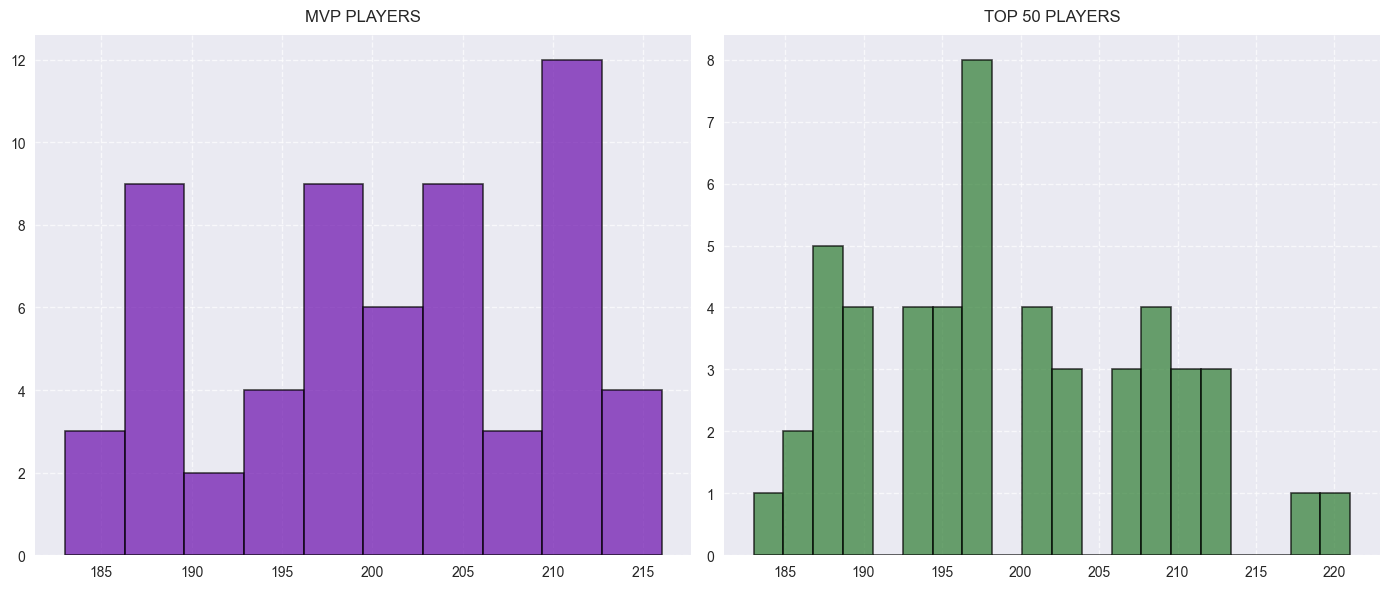

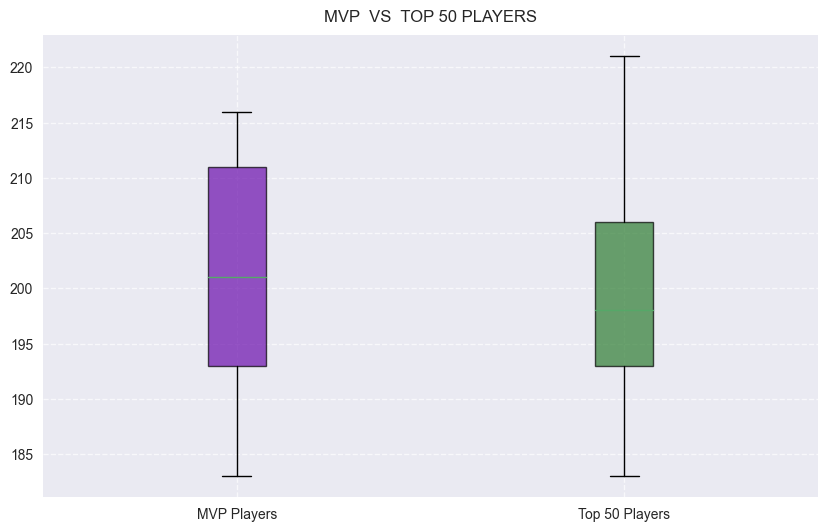

In [105]:
plt.figure(figsize=(14, 6))
plt.style.use('seaborn') 


plt.subplot(1, 2, 1)
plt.hist(df_trophy['Height'], bins=10, alpha=0.7, color='#6A0DAD', edgecolor='black', linewidth=1.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('MVP PLAYERS', fontsize=12, pad=10)

plt.subplot(1, 2, 2)
plt.hist(df_top50['Height'], bins=20, alpha=0.7, color='#2E7D32', edgecolor='black', linewidth=1.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('TOP 50 PLAYERS', fontsize=12, pad=10)
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))
data_for_box = [df_trophy['Height'], df_top50['Height']]
box = plt.boxplot(data_for_box, labels=['MVP Players', 'Top 50 Players'], patch_artist=True)
for patch in box['boxes']:
    patch.set_facecolor('#6A0DAD')
    patch.set_alpha(0.7)
for patch in box['boxes'][1:]:
    patch.set_facecolor('#2E7D32')
    patch.set_alpha(0.7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('MVP  VS  TOP 50 PLAYERS', fontsize=12, pad=10)
plt.xticks(fontsize=10)
plt.show()

<div style="text-align: right; direction: rtl;">
<span style="color: blue;"><h2>تحلیل آماری توزیع قد</h2></span>

<span style="color: blue;"><h3>میانگین قد</h3></span>  
بازیکن‌های MVP (top voters) به‌طور میانگین قد بلندتری دارن (**حدود ۲۰۳ cm**) نسبت به ۵۰ بازیکن برتر (**حدود ۱۹۹ cm**).

<span style="color: blue;"><h3>تنوع</h3></span>  
هر دو گروه تنوع مشابهی دارن، ولی MVPها به سمت قدهای بلندتر متمایلن.

<span style="color: blue;"><h3>تأثیر</h3></span>  
این نشون می‌ده قد توی موفقیت MVP (impact کلی) مهم‌تر از امتیازدهی صرف (PTS) هست.
</div>